# Рубежный контроль №2

## Мурзин В.В., ИУ5Ц-81Б
## Вариант 28

# Тема: Методы построения моделей машинного обучения


### Методы:

1. Линейная/логистическая регрессия
2. Случайный лес

### Данные
https://www.kaggle.com/roysouravcu/forbes-billionaires-of-2021

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import numpy as np

In [2]:
df = pd.read_csv('archive.zip', compression='zip')
df.head(2)

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive


In [3]:
# проверка типов переменных
df.dtypes

Name         object
NetWorth     object
Country      object
Source       object
Rank          int64
Age         float64
Industry     object
dtype: object

In [4]:
df.shape

(2755, 7)

In [5]:
df.Source.nunique(), df.Rank.nunique(), df.Name.nunique(), df.Industry.nunique(), df.Country.nunique()

(924, 245, 2752, 18, 70)

In [6]:
df.drop(['Source', 'Name'], axis=1, inplace=True)

In [7]:
f = lambda x: float(''.join([s for s in list(x) if (s.isnumeric() or s == '.')]))
df['NetWorth'] = df['NetWorth'].apply(f)
df.head(2)

,NetWorth,Country,Rank,Age,Industry
0,177.0,United States,1,57.0,Technology
1,151.0,United States,2,49.0,Automotive


In [8]:
df.isna().sum()

NetWorth     0
Country      0
Rank         0
Age         79
Industry     0
dtype: int64

In [9]:
df['Age'] = df['Age'].fillna(-1)

In [10]:
df.corr()

,NetWorth,Rank,Age
NetWorth,1.000000,-0.475346,0.044209
Rank,-0.475346,1.000000,-0.089193
Age,0.044209,-0.089193,1.000000


In [11]:
df = pd.get_dummies(df, columns=['Industry'])

In [12]:
df.shape

(2755, 22)

In [13]:
X = df.groupby('Country').mean()
X.head(1)

,NetWorth,Rank,Age,Industry_Automotive,Industry_Construction & Engineering,Industry_Diversified,Industry_Energy,Industry_Fashion & Retail,Industry_Finance & Investments,Industry_Food & Beverage,...,Industry_Healthcare,Industry_Logistics,Industry_Manufacturing,Industry_Media & Entertainment,Industry_Metals & Mining,Industry_Real Estate,Industry_Service,Industry_Sports,Industry_Technology,Industry_Telecom
Country,,,,,,,,,,,,,,,,,,,,,
Algeria,4.8,589.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
y = df.groupby('Country')['Rank'].count()

In [15]:
X1, X2 , y1, y2  = train_test_split(X,y, test_size= 0.5, shuffle=True)
X = X1.append(X2)
y = y1.append(y2)
X.head(1)

,NetWorth,Rank,Age,Industry_Automotive,Industry_Construction & Engineering,Industry_Diversified,Industry_Energy,Industry_Fashion & Retail,Industry_Finance & Investments,Industry_Food & Beverage,...,Industry_Healthcare,Industry_Logistics,Industry_Manufacturing,Industry_Media & Entertainment,Industry_Metals & Mining,Industry_Real Estate,Industry_Service,Industry_Sports,Industry_Technology,Industry_Telecom
Country,,,,,,,,,,,,,,,,,,,,,
Nigeria,7.5,401.666667,63.333333,0.0,0.0,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

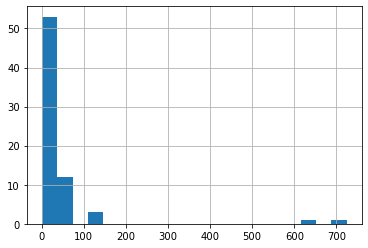

In [16]:
y.hist(bins=20)

Text(0.5, 1.0, 'Лес решающих деревьев')

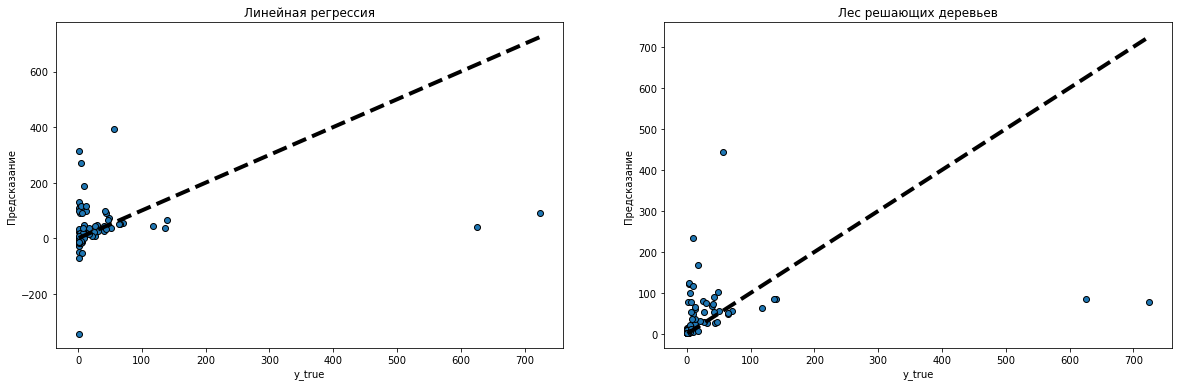

In [17]:
lr = make_pipeline(StandardScaler(), LinearRegression())
rf = RandomForestRegressor(n_estimators = 100, criterion='mae', random_state=12)

predicted_lr = cross_val_predict(lr, X, y, cv=7)
predicted_rf = cross_val_predict(rf, X, y, cv=7)

plt.figure(figsize=(20,6))
plt.subplot(121)
plt.scatter(y, predicted_lr, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('y_true')
plt.ylabel('Предсказание')
plt.title('Линейная регрессия')

plt.subplot(122)
plt.scatter(y, predicted_rf, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('y_true')
plt.ylabel('Предсказание')
plt.title('Лес решающих деревьев')

In [18]:
maes, mses = [], []

for pred in [predicted_lr, predicted_rf]:
    maes.append(mae(y, pred))
    mses.append(mse(y, pred)**0.5)

In [19]:
# сравнение результатов работы
result = pd.DataFrame()
result['mean absolute error'] = maes
result['root mean squared error'] = mses
result.index = ['Линейная регрессия', 'Лес решающих деревьев']
result

,mean absolute error,root mean squared error
Линейная регрессия,69.175750,138.121516
Лес решающих деревьев,50.030857,121.195944
